<a href="https://colab.research.google.com/github/mehrnaz1368/classification/blob/main/Travel_Insurance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
data=pd.read_csv('TravelInsurancePrediction.csv')

In [2]:
print(data.head())

   Unnamed: 0  Age               Employment Type GraduateOrNot  AnnualIncome  \
0           0   31             Government Sector           Yes        400000   
1           1   31  Private Sector/Self Employed           Yes       1250000   
2           2   34  Private Sector/Self Employed           Yes        500000   
3           3   28  Private Sector/Self Employed           Yes        700000   
4           4   28  Private Sector/Self Employed           Yes        700000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3       

In [5]:
data.drop(columns=["Unnamed: 0"], inplace=True)

In [6]:
print(data.isnull().sum())

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [7]:
data.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [ ]:
data.info()

In [9]:
data["FrequentFlyer"]=data["FrequentFlyer"].map({"Yes":1, "No":0})

In [10]:
data["EverTravelledAbroad"]=data["EverTravelledAbroad"].map({"Yes":1, "No":0})

In [11]:
data["GraduateOrNot"]=data["GraduateOrNot"].map({"Yes":1, "No":0})

In [14]:
print(data.head())

   Age               Employment Type  GraduateOrNot  AnnualIncome  \
0   31             Government Sector              1        400000   
1   31  Private Sector/Self Employed              1       1250000   
2   34  Private Sector/Self Employed              1        500000   
3   28  Private Sector/Self Employed              1        700000   
4   28  Private Sector/Self Employed              1        700000   

   FamilyMembers  ChronicDiseases  FrequentFlyer  EverTravelledAbroad  \
0              6                1              0                    0   
1              7                0              0                    0   
2              4                1              0                    0   
3              3                1              0                    0   
4              8                1              1                    0   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  


In [15]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "Age", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Age")
figure.show()

In [16]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "Employment Type", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Employment Type")
figure.show()

In [17]:
import plotly.express as px
data = data
figure = px.histogram(data, x = "AnnualIncome", 
                      color = "TravelInsurance", 
                      title= "Factors Affecting Purchase of Travel Insurance: Income")
figure.show()

In [18]:
x = np.array(data[["Age", "GraduateOrNot", 
                   "AnnualIncome", "FamilyMembers", 
                   "ChronicDiseases", "FrequentFlyer", 
                   "EverTravelledAbroad"]])
y = np.array(data[["TravelInsurance"]])

In [27]:
data["TravelInsurance"]=data["TravelInsurance"].map({"Not Purchased":0, "Purchased":1})

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [20]:
print(predictions)

[0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0
 1 1 0 0 0 0 0 0 1 0 0 0 0 0]


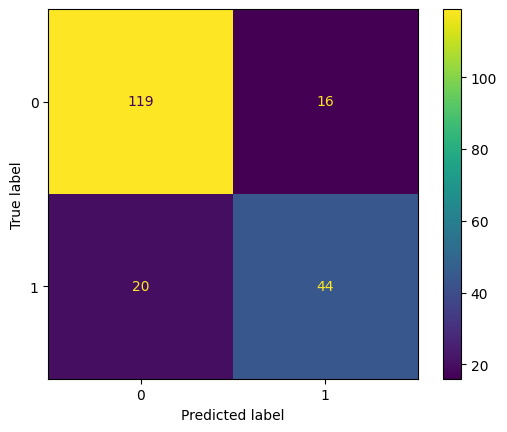

In [34]:
from sklearn.metrics import classification_report, confusion_matrix 
import itertools
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)


In [36]:
print("TravelInsurance Prediction: ")
a=float(input("Age: "))
b=float(input("GraduateOrNo: "))
c=float(input("AnnualIncome: "))
d=float(input("FamilyMembers: "))
e=float(input("ChronicDiseases: "))
f=float(input("FrequentFlyer: "))
g=float(input("EverTravelledAbroad: "))

features= np.array([[a, b, c, d, e, f, g]])
print("TravelInsurance Prediction=", model.predict(features))

TravelInsurance Prediction: 
Age: 24
GraduateOrNo: 1
AnnualIncome: 450000
FamilyMembers: 2
ChronicDiseases: 0
FrequentFlyer: 1
EverTravelledAbroad: 1
TravelInsurance Prediction= [0]
